# Algorithme des k-moyennes


In [67]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

In [68]:
import sys

sys.path.append('../')
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


In [69]:
def normalisation(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    
    return normalized_df

norm = normalisation(data_2D)
norm

X    Y
0   0.000000  0.6
1   0.142857  0.5
2   0.142857  0.0
3   0.285714  0.0
4   0.285714  0.2
5   0.571429  0.6
6   0.571429  0.8
7   0.571429  1.0
8   0.642857  0.0
9   0.642857  1.0
10  0.714286  0.0
11  0.714286  0.8
12  0.857143  0.2
13  1.000000  0.6

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


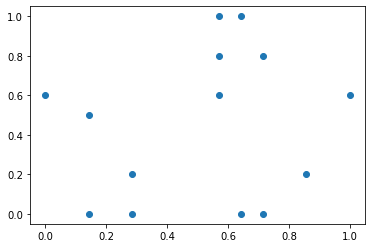

In [70]:
# Affichage des points après normalisation:

DataFnorm = normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

In [71]:
def dist_euclidienne_vect(V1,V2):
    dist = (V1-V2)**2
    return dist.sum() ** 0.5
    


def dist_manhattan_vect(V1,V2):
    dist = abs(V1-V2)
    return dist.sum()


def dist_vect(mode,v1,v2):
    if(mode == "euclidienne"):
        return dist_euclidienne_vect(v1,v2)
    if(mode == "manhattan"):
        return dist_manhattan_vect(v1,v2)
    

In [72]:
dist_vect("euclidienne",DataFnorm.iloc[0],DataFnorm.iloc[7])

0.6975174637562116

### Calcul de centroides

In [73]:
def centroide(df):
    return df.mean().to_frame().T

In [74]:
centroide(DataFnorm)

X     Y
0  0.510204  0.45

### Inertie d'un cluster
La fonction <code>inertie_cluster</code> étant donné un DataFrame contenant un ensemble d'exemples, rend la valeur de l'inertie de cet ensemble.

In [75]:
def inertie_cluster(df):
    cf = centroide(df)
    
    shape = df.shape
    inertie = 0
    

    
    for i in range(shape[0]):
        inertie += dist_vect("euclidienne",df.iloc[i],cf.iloc[0])**2
    
    return inertie


In [76]:
print("inertie :",inertie_cluster(DataFnorm))

inertie : 2.975991253644316


Dans ce qui suit, on appelle "ensemble de centroides" un dataframe contenant $K$ vecteurs de dimensions $p$.

La fonction <code>initialisation()</code> étant donné un entier $K>1$ et une base d'apprentissage (sous la forme d'un DataFrame) de $n$ exemples rend un dataframe contenant $K$ exemples tirés aléatoirement dans la base.
On fait l'hypothèse que $K\leq n$.

In [77]:
import random
def tirage(VX, m, remise):
    if(len(VX) < m):
        m = len(VX)


    if(remise):
        tirage = []
        
        for i in range (m):
            choix = random.choice(VX)
            #print(choix)
            tirage.append(random.choice(VX))
    else:
        tirage = random.sample(VX,m)
    return tirage

In [78]:
def removeList(liste,listeR):
    retour = liste
    for i in listeR:
        retour.remove(i)
    return retour

In [79]:
liste = [1,2,3,4]
test = [1,3]

In [80]:
import math

def initialisation(n,df):
    shape = df.shape
    listeElement = list(range(shape[0]))
    
    nbTirage = math.ceil(shape[0]/n)
    
    listeDF = []
    
    for i in range(n):
        listeEnsemble = tirage(listeElement,1,False)
        listeElement = removeList(listeElement,listeEnsemble)
        
        newDF = df.iloc[listeEnsemble[0]].to_frame().T
        
        listeDF.append(newDF)
        
    
    result = pd.concat(listeDF)
    
    return result


In [81]:
# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = initialisation(3,DataFnorm)

Centroides_test = DataFnorm.loc[[8,1,7]]
Centroides_test

X    Y
8  0.642857  0.0
1  0.142857  0.5
7  0.571429  1.0

En utilisant l'option <code>"color='blue'"</code> ou <code>"color='red'"</code> de la fonction <code>scatter()<code>, on peut réaliser l'affichage de la base d'apprentissage (en bleu) et des centroides initiaux (en rouge).

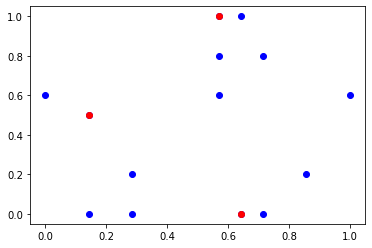

In [82]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='blue')
plt.scatter(Centroides_test['X'],Centroides_test['Y'],color='red')

La fonction <code>plus_proche()</code> étant donné un exemple et un dataframe contenant un ensemble de centroides, rend l'indice (dans le DataFrame) du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [83]:
def plus_proche(exemple,df):
    size = df.shape[0]
    dist_min = math.inf
    indice_min = -1
    for i in range(size):
        dist = dist_vect("euclidienne",df.iloc[i],exemple)
        if(dist < dist_min):
            indice_min = i
            dist_min = dist
     
    return indice_min


In [84]:
for i in range(0,len(DataFnorm)):
    pproche = plus_proche(DataFnorm.iloc[i],Centroides_test)
    print("Exemple ",f'{i:2}',": (",f"{DataFnorm.iloc[i]['X']:.4f}",", ",f"{DataFnorm.iloc[i]['Y']:.4f}", ")",\
          "est plus proche du centroide",pproche, ": (",f"{Centroides_test.iloc[pproche]['X']:.4f}",", ", \
          f"{Centroides_test.iloc[pproche]['Y']:.4f}",")")
        

Exemple   0 : ( 0.0000 ,  0.6000 ) est plus proche du centroide 1 : ( 0.1429 ,  0.5000 )
Exemple   1 : ( 0.1429 ,  0.5000 ) est plus proche du centroide 1 : ( 0.1429 ,  0.5000 )
Exemple   2 : ( 0.1429 ,  0.0000 ) est plus proche du centroide 0 : ( 0.6429 ,  0.0000 )
Exemple   3 : ( 0.2857 ,  0.0000 ) est plus proche du centroide 0 : ( 0.6429 ,  0.0000 )
Exemple   4 : ( 0.2857 ,  0.2000 ) est plus proche du centroide 1 : ( 0.1429 ,  0.5000 )
Exemple   5 : ( 0.5714 ,  0.6000 ) est plus proche du centroide 2 : ( 0.5714 ,  1.0000 )
Exemple   6 : ( 0.5714 ,  0.8000 ) est plus proche du centroide 2 : ( 0.5714 ,  1.0000 )
Exemple   7 : ( 0.5714 ,  1.0000 ) est plus proche du centroide 2 : ( 0.5714 ,  1.0000 )
Exemple   8 : ( 0.6429 ,  0.0000 ) est plus proche du centroide 0 : ( 0.6429 ,  0.0000 )
Exemple   9 : ( 0.6429 ,  1.0000 ) est plus proche du centroide 2 : ( 0.5714 ,  1.0000 )
Exemple  10 : ( 0.7143 ,  0.0000 ) est plus proche du centroide 0 : ( 0.6429 ,  0.0000 )
Exemple  11 : ( 0.714

### Matrice d'affectation

Etant donné une base d'apprentissage, on peut représenter une partition de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une par exemple) et K colonnes (une par cluster) telle que 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** une telle matrice U.


Une expression mathématique des 2 dernières contraintes que vérifie une matrice d'affectation.

### Implémentation en Python
Nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux $K$ indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


La fonction <code>affecte_cluster()</code> étant donné une base d'apprentissage et un ensemble de centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [85]:
def affecte_cluster(df,ensemble):
    dictionnaire = dict()
    for i in range(ensemble.shape[0]):
        dictionnaire[i] = []
    
    for i in range(df.shape[0]):
        indice = plus_proche(df.iloc[i],ensemble)
        

        dictionnaire[indice].append(i)
    
    return dictionnaire



In [86]:
DictAffect = affecte_cluster(DataFnorm, Centroides_test)
DictAffect

{0: [2, 3, 8, 10, 12], 1: [0, 1, 4], 2: [5, 6, 7, 9, 11, 13]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les moyennes des ensembles des exemples qui sont affectés au même cluster.

La fonction <code>nouveaux_centroides()</code> étant donné une base d'apprentissage et une matrice d'affectation, rend l'ensemble des nouveaux centroides obtenus.

In [132]:
def nouveaux_centroides(df,mAffect):    
    listeDF = []
    for l in mAffect.values():
        liste = []
        for i in l:
            liste.append(i)
        newDF = centroide(df.reindex(liste))
        listeDF.append(newDF)
    result = pd.concat(listeDF)
    return result

In [88]:
nouveaux_centroides(DataFnorm, DictAffect)

X         Y
0  0.528571  0.040000
0  0.142857  0.433333
0  0.678571  0.800000

### Inertie globale d'une partition

La fonction <code>inertie_globale()</code> étant donné une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [125]:
def inertie_globale(df,mAffect):
    
    inertieGlobale = 0
    
    
    for l in mAffect.values():    
        liste = []
        
        for i in l:
            liste.append(i)
        
        
        
        
        newDF = df.reindex(liste)
        inertieCluster = inertie_cluster(newDF)
        inertieGlobale += inertieCluster
        
        
    return inertieGlobale



In [126]:
inertie_globale(DataFnorm,DictAffect)

0.8230544217687075

### Algorithme des K-moyennes

La fonction <code>kmoyennes()</code> prend en argument un entier $K>1$, une base d'apprentissage, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* servira de critère de convergence, et l'entier *iter_max* sera utilisé pour fixer un nombre d'itérations maximale servant à arrêter le calcul.

In [91]:
def kmoyennes(k,df,epsilon,iter_max):
    centroides = initialisation(k,df)
    mAffect = affecte_cluster(df,centroides)
    inertie = math.inf
    newInertie = inertie_globale(df,mAffect)
    
    
    
    print("initialisation",mAffect)
    
    for i in range(iter_max):
        difference = abs(newInertie - inertie) 
        
        if(inertie == math.inf):
            difference = inertie
            
        if(difference < epsilon and difference != math.inf):
            break;
        
        
        
        centroides = nouveaux_centroides(df,mAffect)
        mAffect = affecte_cluster(df,centroides)
        
        
        inertie = newInertie
        newInertie = inertie_globale(df,mAffect)
        
        
    return centroides,mAffect

In [92]:
les_centres, l_affectation = kmoyennes(2, DataFnorm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

initialisation {0: [0, 1, 2, 3, 4], 1: [5, 6, 7, 8, 9, 10, 11, 12, 13]}
Affichage des centres:            X         Y
0  0.316327  0.185714
0  0.704082  0.714286
Affichage des affectations:  {0: [0, 1, 2, 3, 4, 8, 10], 1: [5, 6, 7, 9, 11, 12, 13]}


In [93]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 100) 

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

initialisation {0: [5, 6, 7, 9, 11, 13], 1: [8, 10, 12], 2: [0, 1, 2, 3, 4]}
Affichage des centres:            X         Y
0  0.678571  0.800000
0  0.738095  0.066667
0  0.171429  0.260000
Affichage des affectations:  {0: [5, 6, 7, 9, 11, 13], 1: [8, 10, 12], 2: [0, 1, 2, 3, 4]}


On peut réaliser un affichage couleur des centroïdes trouvés:

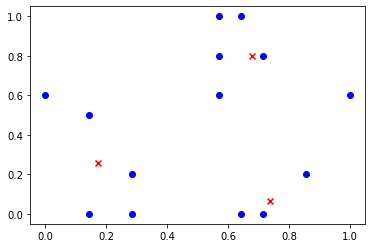

In [94]:
plt.scatter(DataFnorm['X'],DataFnorm['Y'],color='b')
plt.scatter(les_centres['X'],les_centres['Y'],color='r',marker='x')

La fonction <code>affiche_resultat()</code> permet d'afficher le résultat de l'algorithme en utilisant des couleurs différentes pour les clusters trouvés (pour faire simple, on peut ne considèrer que le cas où K vaut 3).

*Remarque*: La librairie matplotlib permet de manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

In [129]:
def affiche_resultat(df,centroides,mAffect):
    listeColor =['b', 'g', 'c', 'm', 'y', 'k', 'w','r']
    
    
    cpt = 0
    for l in mAffect.values():    
        liste = []
        
        for i in l:
            liste.append(i)
        
        newDF = df.reindex(liste)
        
        plt.scatter(newDF['X'],newDF['Y'],color=listeColor[cpt])
        cpt += 1
    
    plt.scatter(les_centres['X'],les_centres['Y'],color='r',marker='x')


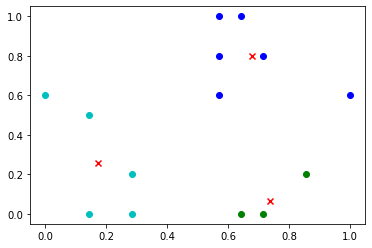

In [96]:
affiche_resultat(DataFnorm,les_centres,l_affectation)

### Expérimentations

Impact du choix de $K$ sur l'inertie globale finale.
Impact du choix de epsilon / max_iter 

initialisation {0: [2, 3, 4, 8, 10, 12], 1: [0, 1, 5, 6, 11, 13], 2: [7, 9]}
Affichage des centres:            X         Y
0  0.488095  0.066667
0  0.500000  0.650000
0  0.607143  1.000000
Affichage des affectations:  {0: [2, 3, 4, 8, 10, 12], 1: [0, 1, 5, 6, 13], 2: [7, 9, 11]}


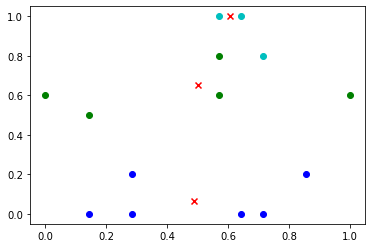

In [97]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.05, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(DataFnorm,les_centres,l_affectation)

initialisation {0: [0, 1, 4, 8, 10, 12], 1: [2, 3], 2: [5, 6, 7, 9, 11, 13]}
Affichage des centres:            X     Y
0  0.440476  0.25
0  0.214286  0.00
0  0.678571  0.80
Affichage des affectations:  {0: [0, 1, 4, 8, 10, 12], 1: [2, 3], 2: [5, 6, 7, 9, 11, 13]}


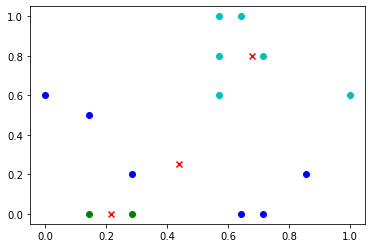

In [98]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.0001, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(DataFnorm,les_centres,l_affectation)

initialisation {0: [13], 1: [0, 1, 5, 6, 7, 9, 11], 2: [2, 3, 4, 8, 10, 12]}
Affichage des centres:            X         Y
0  1.000000  0.600000
0  0.459184  0.757143
0  0.488095  0.066667
Affichage des affectations:  {0: [13], 1: [0, 1, 5, 6, 7, 9, 11], 2: [2, 3, 4, 8, 10, 12]}


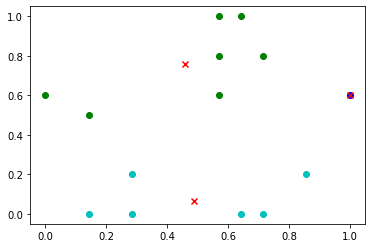

In [99]:
les_centres, l_affectation = kmoyennes(3, DataFnorm, 0.30, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(DataFnorm,les_centres,l_affectation)

initialisation {0: [5, 6, 7, 9, 11, 13], 1: [0, 1], 2: [8, 10, 12], 3: [2, 3, 4]}
Affichage des centres:            X         Y
0  0.678571  0.800000
0  0.071429  0.550000
0  0.738095  0.066667
0  0.238095  0.066667
Affichage des affectations:  {0: [5, 6, 7, 9, 11, 13], 1: [0, 1], 2: [8, 10, 12], 3: [2, 3, 4]}


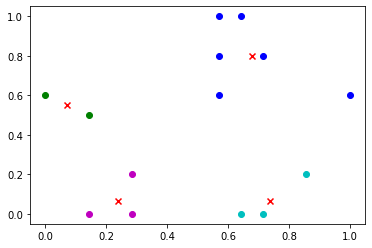

In [100]:
les_centres, l_affectation = kmoyennes(4, DataFnorm, 0.05, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(DataFnorm,les_centres,l_affectation)

initialisation {0: [10], 1: [5, 6, 7, 9, 11], 2: [8], 3: [13], 4: [12], 5: [0, 1], 6: [2, 3], 7: [4]}
Affichage des centres:            X     Y
0  0.714286  0.00
0  0.614286  0.84
0  0.642857  0.00
0  1.000000  0.60
0  0.857143  0.20
0  0.071429  0.55
0  0.214286  0.00
0  0.285714  0.20
Affichage des affectations:  {0: [10], 1: [5, 6, 7, 9, 11], 2: [8], 3: [13], 4: [12], 5: [0, 1], 6: [2, 3], 7: [4]}


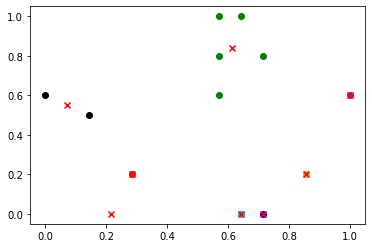

In [101]:
les_centres, l_affectation = kmoyennes(8, DataFnorm, 0.01, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(DataFnorm,les_centres,l_affectation)

## Application à des données réelles

- Application de l'algorithme aux données concernant les déchets de la ville de Paris (qui sont fournies dans le répertoire data)

In [102]:
import sys

sys.path.append('../')

paris_dechet = open("data/paris_dechet.csv","r")

data_Paris = pd.read_csv(paris_dechet,delimiter=';')

data_Paris.head(-1)

GranularitÃ©  janv-11  fÃ©vr-11  mars-11  avr-11  mai-11  juin-11  juil-11  \
0         75007    288.1     249.1    303.7   255.8   287.8    288.4    249.6   
1         75013    596.5     540.2    618.5   558.6   595.9    581.7    539.2   
2         75014    464.0     404.9    465.3   420.2   405.3    446.0    412.9   
3         75015    903.1     801.4    937.5   835.5   876.8    888.6    628.8   
4         75017    451.1     412.4    491.6   422.7   363.6    446.4    409.5   
5         75018    427.0     394.3    455.2   419.9   458.3    456.6    418.0   
6         75019    323.4     287.3    350.3   317.8   336.9    340.7    311.6   
7         75002    153.0     125.8    136.6   126.6   133.2    127.6    126.7   
8         75004    116.3     115.7    133.4   115.0   123.2    120.5    114.5   
9         75008    252.6     246.7    252.9   232.5   199.4    236.4    175.4   
10        75012    484.2     445.9    517.0   452.0   402.0    488.0    456.0   
11        75016    584.1     571.2    684.7   590.3   563.4    666.3    570.4   
12        75020    394.1     366.3    422.7   367.1   273.5    381.7    353.4   
13    ToutParis   7134.2    6462.6   7517.4  6656.6  6563.4   7063.0   6220.2   
14        75001     75.3      60.4     71.2    59.5    73.9     72.0     57.9   
15        75005    247.0     211.0    251.0   218.0   185.0    224.0    213.3   
16        75006    222.0     189.0    218.0   192.0   180.0    199.0    171.8   
17        75010    273.0     248.6    292.2   255.2   284.3    267.3    246.6   
18        75011    487.2     422.2    491.0   437.0   466.0    443.0    373.5   
19        75003    183.9     173.1    204.2   183.0   203.2    181.9    191.2   

    aoÃ»t-11  sept-11  oct-11  nov-11  dÃ©c-11  Total arrondissement 2011  
0      185.6    281.3   284.3   296.4    301.1                        NaN  
1      490.5    597.8   575.7   580.5    601.4                        NaN  
2      348.7    449.3   446.3   453.1    484.3                        NaN  
3      674.8    913.3   878.7   895.7    935.8                        NaN  
4      332.3    416.4   451.5   475.1    513.5                        NaN  
5      361.8    464.6   453.4   478.5    470.9                        NaN  
6      281.0    345.6   335.6   367.0    354.5                        NaN  
7      114.3    144.3   145.1   129.5    129.8                        NaN  
8       97.6    130.5   123.0   124.3    133.7                        NaN  
9      189.4    266.6   230.3   257.7    224.4                        NaN  
10     409.0    506.0   495.0   493.0    502.0                        NaN  
11     433.2    679.7   656.1   662.6    699.9                        NaN  
12     297.0    414.0   350.0   410.6    410.0                        NaN  
13    5464.0   7296.3  7084.6  7291.7   7492.8                        NaN  
14      56.4     75.5    75.7    65.8     79.1                        NaN  
15     162.9    203.4   232.1   227.6    251.6                        NaN  
16     134.8    183.1   195.5   213.8    204.1                        NaN  
17     210.3    280.6   275.6   284.6    283.2                        NaN  
18     367.5    511.9   490.6   469.2    487.9                        NaN  
19     153.6    208.6   186.5   192.9    189.9                        NaN

In [103]:
new_data_Paris = data_Paris.copy()

#TOUT PARIS = 0.0
new_data_Paris["GranularitÃ©"][13] = "00000"
new_data_Paris = new_data_Paris.sort_values(by=['GranularitÃ©'])
data_Paris_NoArr = new_data_Paris.drop(["GranularitÃ©"],axis=1)


new_data_Paris = new_data_Paris.astype('float')
new_data_Paris["Total arrondissement 2011"] = data_Paris_NoArr.sum(axis = 1)

new_data_Paris

C:\Programmation\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


GranularitÃ©  janv-11  fÃ©vr-11  mars-11  avr-11  mai-11  juin-11  \
13           0.0   7134.2    6462.6   7517.4  6656.6  6563.4   7063.0   
14       75001.0     75.3      60.4     71.2    59.5    73.9     72.0   
7        75002.0    153.0     125.8    136.6   126.6   133.2    127.6   
19       75003.0    183.9     173.1    204.2   183.0   203.2    181.9   
8        75004.0    116.3     115.7    133.4   115.0   123.2    120.5   
15       75005.0    247.0     211.0    251.0   218.0   185.0    224.0   
16       75006.0    222.0     189.0    218.0   192.0   180.0    199.0   
0        75007.0    288.1     249.1    303.7   255.8   287.8    288.4   
9        75008.0    252.6     246.7    252.9   232.5   199.4    236.4   
20       75009.0    208.3     197.1    220.4   197.9   151.7    206.9   
17       75010.0    273.0     248.6    292.2   255.2   284.3    267.3   
18       75011.0    487.2     422.2    491.0   437.0   466.0    443.0   
10       75012.0    484.2     445.9    517.0   452.0   402.0    488.0   
1        75013.0    596.5     540.2    618.5   558.6   595.9    581.7   
2        75014.0    464.0     404.9    465.3   420.2   405.3    446.0   
3        75015.0    903.1     801.4    937.5   835.5   876.8    888.6   
11       75016.0    584.1     571.2    684.7   590.3   563.4    666.3   
4        75017.0    451.1     412.4    491.6   422.7   363.6    446.4   
5        75018.0    427.0     394.3    455.2   419.9   458.3    456.6   
6        75019.0    323.4     287.3    350.3   317.8   336.9    340.7   
12       75020.0    394.1     366.3    422.7   367.1   273.5    381.7   

    juil-11  aoÃ»t-11  sept-11  oct-11  nov-11  dÃ©c-11  \
13   6220.2    5464.0   7296.3  7084.6  7291.7   7492.8   
14     57.9      56.4     75.5    75.7    65.8     79.1   
7     126.7     114.3    144.3   145.1   129.5    129.8   
19    191.2     153.6    208.6   186.5   192.9    189.9   
8     114.5      97.6    130.5   123.0   124.3    133.7   
15    213.3     162.9    203.4   232.1   227.6    251.6   
16    171.8     134.8    183.1   195.5   213.8    204.1   
0     249.6     185.6    281.3   284.3   296.4    301.1   
9     175.4     189.4    266.6   230.3   257.7    224.4   
20    199.9     163.3    223.8   203.6   213.8    235.7   
17    246.6     210.3    280.6   275.6   284.6    283.2   
18    373.5     367.5    511.9   490.6   469.2    487.9   
10    456.0     409.0    506.0   495.0   493.0    502.0   
1     539.2     490.5    597.8   575.7   580.5    601.4   
2     412.9     348.7    449.3   446.3   453.1    484.3   
3     628.8     674.8    913.3   878.7   895.7    935.8   
11    570.4     433.2    679.7   656.1   662.6    699.9   
4     409.5     332.3    416.4   451.5   475.1    513.5   
5     418.0     361.8    464.6   453.4   478.5    470.9   
6     311.6     281.0    345.6   335.6   367.0    354.5   
12    353.4     297.0    414.0   350.0   410.6    410.0   

    Total arrondissement 2011  
13                    82246.8  
14                      822.7  
7                      1592.5  
19                     2252.0  
8                      1447.7  
15                     2626.9  
16                     2303.1  
0                      3271.2  
9                      2764.3  
20                     2422.4  
17                     3201.5  
18                     5447.0  
10                     5650.1  
1                      6876.5  
2                      5200.3  
3                     10170.0  
11                     7361.9  
4                      5186.1  
5                      5258.5  
6                      3951.7  
12                     4440.4

In [104]:
matrixParis = new_data_Paris.values
matrixParis = np.delete(matrixParis,13,1)
matrixParis = np.delete(matrixParis,0,1)


#matrixParis[:,12] = np.sum(matrixParis[:,0:12],axis=0)

matrixParis

dataParisReduced = data_Paris_NoArr.drop(["Total arrondissement 2011"],axis=1)
dataParisReduced = dataParisReduced.drop([13],axis=0)

newDataParis = normalisation(dataParisReduced)


newDataParis = newDataParis.sort_index()
#newDataParis = newDataParis.loc[:,"janv-11":"févr-11"]
#newDataParis.columns = ["X","Y"]

newDataParis

janv-11  fÃ©vr-11   mars-11    avr-11    mai-11   juin-11   juil-11  \
0   0.257067  0.254656  0.268383  0.252964  0.266409  0.265001  0.335786   
1   0.629621  0.647503  0.631767  0.643170  0.650143  0.624173  0.843055   
2   0.469558  0.464912  0.454923  0.464820  0.412754  0.457997  0.621825   
3   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4   0.453974  0.475034  0.485282  0.468041  0.360817  0.458486  0.615870   
5   0.424861  0.450607  0.443264  0.464433  0.478764  0.470977  0.630758   
6   0.299710  0.306208  0.322175  0.332861  0.327563  0.329047  0.444386   
7   0.093863  0.088259  0.075493  0.086469  0.073857  0.068087  0.120511   
8   0.049529  0.074629  0.071800  0.071521  0.061402  0.059393  0.099142   
9   0.214182  0.251417  0.209743  0.222938  0.156308  0.201323  0.205815   
10  0.493960  0.520243  0.514602  0.505799  0.408644  0.509429  0.697320   
11  0.614641  0.689339  0.708184  0.684021  0.609665  0.727774  0.897705   
12  0.385117  0.412821  0.405749  0.396392  0.248599  0.379255  0.517604   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15  0.207417  0.203239  0.207549  0.204253  0.138373  0.186138  0.272202   
16  0.177217  0.173549  0.169456  0.170747  0.132146  0.155523  0.199510   
17  0.238826  0.253981  0.255108  0.252191  0.262050  0.239162  0.330531   
18  0.497584  0.488259  0.484590  0.486469  0.488355  0.454323  0.552811   
19  0.131191  0.152092  0.153526  0.159149  0.161041  0.134582  0.233491   
20  0.160667  0.184480  0.172227  0.178351  0.096899  0.165197  0.248730   

    aoÃ»t-11   sept-11    oct-11    nov-11   dÃ©c-11  
0   0.208926  0.245643  0.259776  0.277865  0.259134  
1   0.701973  0.623418  0.622665  0.620195  0.609665  
2   0.472671  0.446169  0.461519  0.466683  0.472978  
3   1.000000  1.000000  1.000000  1.000000  1.000000  
4   0.446151  0.406899  0.467995  0.493192  0.507062  
5   0.493855  0.464431  0.470361  0.497289  0.457336  
6   0.363195  0.322392  0.323661  0.362935  0.321466  
7   0.093629  0.082120  0.086426  0.076756  0.059181  
8   0.066624  0.065648  0.058904  0.070490  0.063733  
9   0.215071  0.228097  0.192528  0.231233  0.169604  
10  0.570181  0.513846  0.522167  0.514761  0.493638  
11  0.609314  0.721175  0.722790  0.719123  0.724641  
12  0.389069  0.404034  0.341594  0.415472  0.386250  
14  0.000000  0.000000  0.000000  0.000000  0.000000  
15  0.172219  0.152662  0.194770  0.194963  0.201354  
16  0.126779  0.128432  0.149191  0.178335  0.145909  
17  0.248868  0.244808  0.248941  0.263646  0.238240  
18  0.503072  0.520888  0.516687  0.486083  0.477180  
19  0.157180  0.158868  0.137983  0.153151  0.129333  
20  0.172865  0.177011  0.159278  0.178335  0.182794

In [134]:
les_centres, l_affectation = kmoyennes(3, newDataParis, 0.05, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

initialisation {0: [1, 2, 4, 5, 6, 10, 12, 17], 1: [0, 7, 8, 9, 13, 14, 15, 16, 18, 19], 2: [3, 11]}
Affichage des centres:      janv-11  fÃ©vr-11   mars-11    avr-11    mai-11   juin-11   juil-11  \
0  0.395144  0.411972  0.411586  0.412077  0.357027  0.406336  0.551185   
0  0.180894  0.187344  0.182282  0.183834  0.164210  0.169374  0.224363   
0  0.748087  0.778947  0.779984  0.775730  0.753269  0.783982  0.913587   

   aoÃ»t-11   sept-11    oct-11    nov-11   dÃ©c-11  
0  0.426284  0.400368  0.405177  0.430568  0.410996  
0  0.171500  0.175818  0.177363  0.185431  0.167270  
0  0.770429  0.781531  0.781818  0.779773  0.778102  
Affichage des affectations:  {0: [2, 4, 5, 6, 10, 12, 17], 1: [0, 7, 8, 9, 13, 14, 15, 16, 18, 19], 2: [1, 3, 11]}


In [135]:
les_centres, l_affectation = kmoyennes(2, newDataParis, 0.05, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

initialisation {0: [13], 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19]}
Affichage des centres:      janv-11  fÃ©vr-11   mars-11    avr-11    mai-11  juin-11   juil-11  \
0       NaN       NaN       NaN       NaN       NaN      NaN       NaN   
0  0.349385  0.363513  0.361137  0.361381  0.328257  0.35372  0.453596   

   aoÃ»t-11   sept-11    oct-11    nov-11   dÃ©c-11  
0       NaN       NaN       NaN       NaN       NaN  
0  0.359936  0.354186  0.356735  0.369588  0.353511  
Affichage des affectations:  {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 1: []}


In [136]:
les_centres, l_affectation = kmoyennes(4, newDataParis, 0.05, 10) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

initialisation {0: [1, 3, 10, 11], 1: [2, 4, 5, 17], 2: [0, 7, 8, 9, 13, 14, 15, 16, 18, 19], 3: [6, 12]}
Affichage des centres:      janv-11  fÃ©vr-11   mars-11    avr-11    mai-11   juin-11   juil-11  \
0  0.748087  0.778947  0.779984  0.775730  0.753269  0.783982  0.913587   
0  0.416236  0.432955  0.430636  0.431057  0.384606  0.427210  0.579261   
0  0.180894  0.187344  0.182282  0.183834  0.164210  0.169374  0.224363   
0  0.342414  0.359514  0.363962  0.364626  0.288081  0.354151  0.480995   

   aoÃ»t-11   sept-11    oct-11    nov-11   dÃ©c-11  
0  0.770429  0.781531  0.781818  0.779773  0.778102  
0  0.446345  0.415230  0.434197  0.447114  0.433851  
0  0.171500  0.175818  0.177363  0.185431  0.167270  
0  0.376132  0.363213  0.332628  0.389204  0.353858  
Affichage des affectations:  {0: [1, 3, 11], 1: [2, 4, 5, 10, 17], 2: [0, 7, 8, 9, 13, 14, 15, 16, 18, 19], 3: [6, 12]}


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')
# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut



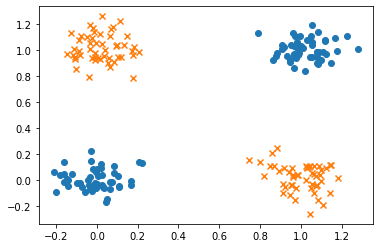

In [138]:
autre_set = ut.createXOR(100,0.01)

ut.plot2DSet(autre_set)

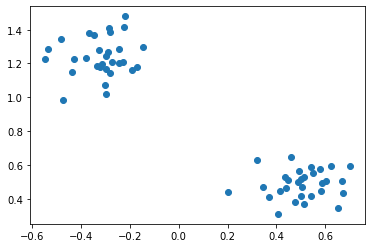

In [140]:
LS = ls.LabeledSet(2)
number_of_points = 30
    
centered_gaussian1 = np.random.multivariate_normal(np.array([-0.3,1.2]),0.01*np.array([[1,0],[0,1]]),number_of_points)
centered_gaussian2 = np.random.multivariate_normal(np.array([0.5,0.5]),0.01*np.array([[1,0],[0,1]]),number_of_points)
for i in range (number_of_points):
    LS.addExample(centered_gaussian1[i],1)
    LS.addExample(centered_gaussian2[i],1)

ut.plot2DSet(LS)

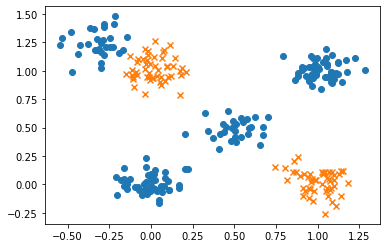

In [141]:
set00 = ut.concatenate(autre_set,LS)
set00 = ut.shuffle_ls(set00)
training_set, testing_set = ut.split_set(set00,70)
ut.plot2DSet(set00)

In [142]:
liste = []
for i in range(set00.size()):
    exemple = set00.getX(i)
    liste.append(exemple)


dataf = pd.DataFrame(data=liste)
dataf.columns = ["X","Y"]

dataf.head()

X         Y
0  1.020663  0.840824
1  0.007745  0.940011
2 -0.148644  0.968013
3  1.149808  0.117375
4 -0.004185 -0.060842

initialisation {0: [0, 4, 5, 7, 8, 11, 14, 15, 17, 19, 22, 24, 25, 26, 28, 29, 30, 36, 38, 39, 40, 41, 42, 46, 48, 50, 52, 54, 57, 59, 64, 65, 70, 71, 72, 73, 74, 78, 79, 81, 84, 93, 94, 96, 101, 102, 103, 104, 105, 107, 108, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 126, 131, 133, 135, 136, 139, 140, 141, 142, 145, 146, 147, 149, 150, 152, 155, 156, 158, 159, 161, 162, 163, 165, 166, 177, 180, 182, 184, 186, 187, 191, 193, 195, 196, 199, 201, 202, 204, 205, 206, 207, 210, 213, 214, 215, 216, 221, 222, 223, 224, 225, 229, 230, 233, 236, 239, 240, 241, 242, 243, 244, 245, 246, 251, 253, 254, 258, 259], 1: [1, 13, 20, 27, 31, 32, 34, 37, 43, 44, 47, 53, 55, 63, 66, 67, 69, 75, 76, 83, 85, 88, 95, 124, 127, 132, 134, 137, 143, 144, 154, 157, 164, 169, 173, 174, 179, 185, 188, 197, 203, 208, 209, 211, 228, 231, 232, 234, 235, 247, 249, 250, 255, 257], 2: [6, 49, 68, 97, 106, 125, 160, 171, 172, 178, 181], 3: [2, 10, 12, 23, 33, 51, 56, 61, 80, 87, 90, 91, 99, 109, 110, 111, 116, 14

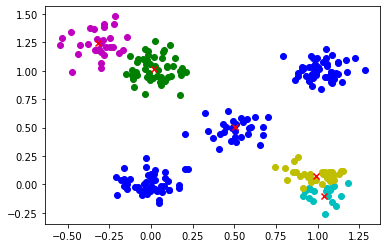

In [143]:
les_centres, l_affectation = kmoyennes(5, dataf, 0.05, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(dataf,les_centres,l_affectation)

In [145]:
sigma = 2
nb_points = 50
ls1 = ut.createGaussianDataset(np.array([0,0,0]),sigma * np.array([[1,0,0],[0,1,0],[0,0,1]]),np.array([1,0,0.5]),sigma * np.array([[1,0,0],[0,1,0],[0,0,1]]),math.ceil(nb_points/2))
ls2 = ut.createGaussianDataset(np.array([1,1,0]),sigma * np.array([[1,0,0],[0,1,0],[0,0,1]]),np.array([0,1,0.5]),sigma * np.array([[1,0,0],[0,1,0],[0,0,1]]),math.floor(nb_points/2))

set00 = ut.concatenate(ls1,ls2)

liste = []
for i in range(set00.size()):
    exemple = set00.getX(i)
    liste.append(exemple)


dataf = pd.DataFrame(data=liste)
dataf.columns = ["X","Y","Z"]

dataf.head()

X         Y         Z
0 -0.269544  2.323770 -1.117582
1  1.747559  1.194319 -1.552190
2 -0.875101 -0.417856  1.600281
3  1.475644  0.343149  0.857774
4 -0.973070 -1.675775 -0.172265

initialisation {0: [2, 5, 16, 21, 24, 26, 31, 35, 36, 47, 48, 50, 52, 55, 57, 58, 59, 65, 74, 79, 81, 82, 85, 86, 87, 89], 1: [17, 27, 28, 37, 39, 42, 43, 49, 62, 64, 71, 77, 93, 97], 2: [0, 1, 3, 10, 12, 13, 22, 30, 34, 38, 41, 46, 51, 53, 56, 60, 61, 63, 66, 68, 69, 70, 72, 73, 75, 76, 78, 80, 83, 84, 90, 92, 94, 96, 98, 99], 3: [4, 6, 7, 8, 9, 11, 14, 15, 18, 19, 20, 23, 25, 32, 33, 40, 54, 67, 88, 91, 95], 4: [29, 44, 45]}
Affichage des centres:            X         Y         Z
0 -1.089871  0.911427  0.845155
0  1.011328  0.625774  2.558416
0  1.547205  1.237236 -0.019843
0 -0.243005 -1.486422 -1.036678
0  1.534723 -1.170898  0.687499
Affichage des affectations:  {0: [2, 5, 9, 10, 16, 21, 24, 26, 30, 34, 35, 36, 38, 47, 50, 52, 55, 57, 58, 59, 63, 65, 74, 78, 79, 81, 82, 83, 85, 87, 88, 89, 99], 1: [17, 22, 27, 28, 37, 42, 46, 48, 49, 53, 62, 64, 68, 71, 77, 84, 86, 93, 97], 2: [0, 1, 3, 6, 12, 13, 41, 51, 56, 60, 61, 66, 69, 70, 72, 73, 75, 76, 80, 90, 92, 94, 96, 98], 3: [4, 7, 1

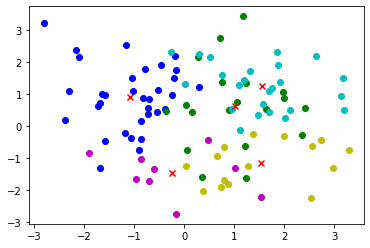

In [146]:
les_centres, l_affectation = kmoyennes(5, dataf, 0.05, 100) 
print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)
affiche_resultat(dataf,les_centres,l_affectation)